# ロジスティック回帰による結果変数の分類

In [5]:
import pymc3 as pm
import numpy as np
import pandas as pd
import theano.tensor as tt
import seaborn as sns
import scipy.stats as stats
from scipy.special import expit as logistic
import matplotlib.pyplot as plt
import arviz as az
az.style.use('arviz-darkgrid')
plt.style.use("seaborn-darkgrid")
np.set_printoptions(precision=2)
pd.set_option("display.precision", 2)

/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_98355/1832621963.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


## 5.1 ロジスティック回帰

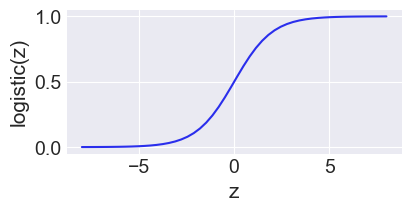

In [8]:
plt.figure(figsize=(4,2))
z = np.linspace(-8, 8)
plt.plot(z, 1 / (1 + np.exp(-z)))
plt.xlabel('z')
plt.ylabel('logistic(z)')
plt.savefig('img501.png', dpi=300);

### 5.1.2 アイリスデータセット

In [9]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


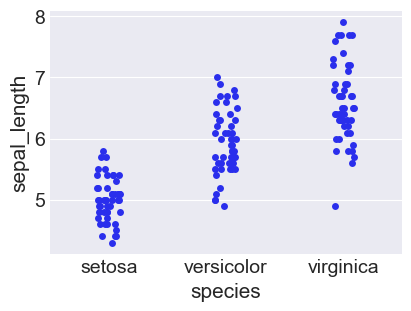

In [17]:
plt.figure(figsize=(4,3))
sns.stripplot(x="species", y="sepal_length", data=iris, jitter=True)
plt.savefig("img503.png")

/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/seaborn/axisgrid.py:208: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)


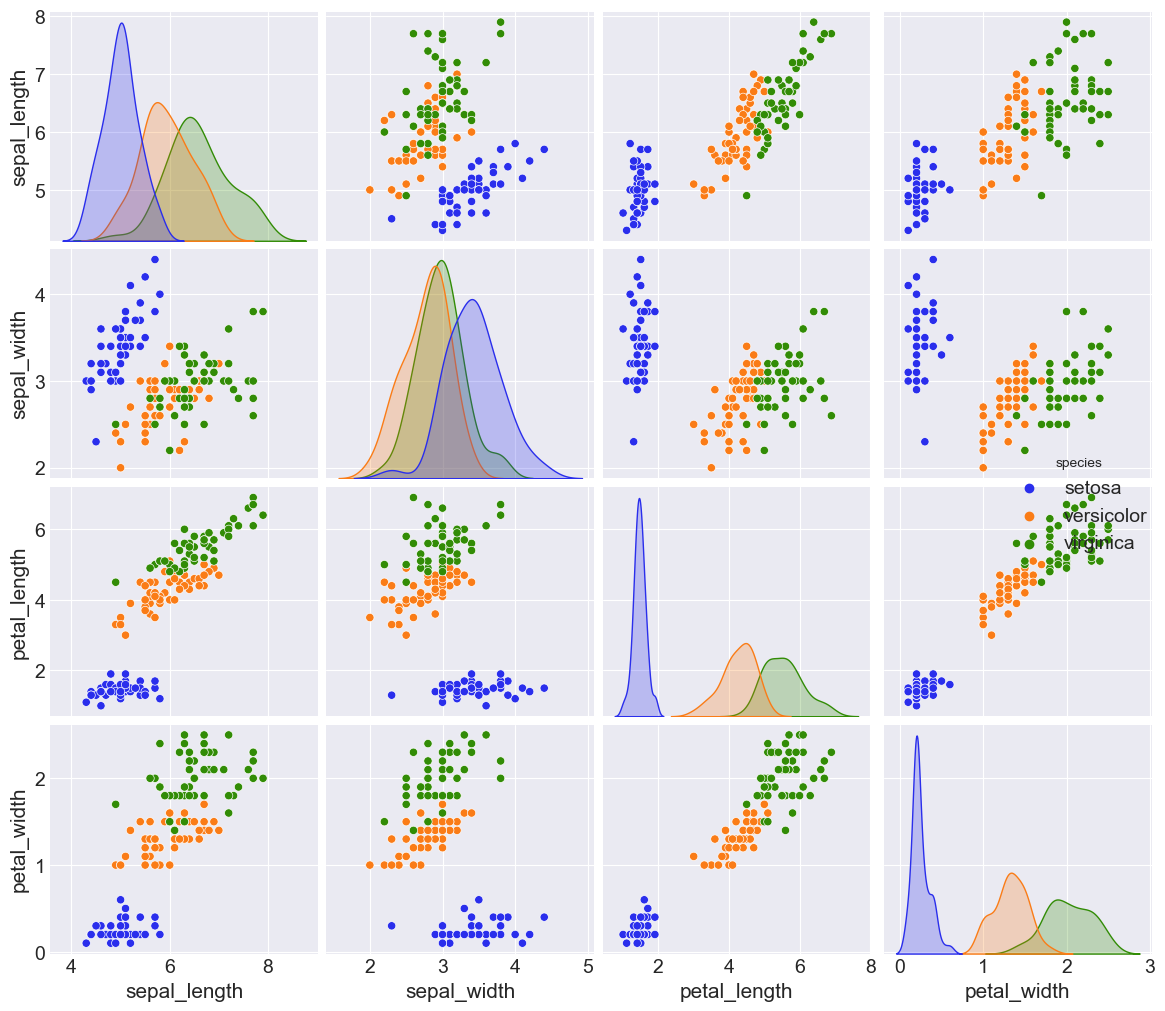

In [16]:
sns.pairplot(iris, hue='species', diag_kind='kde')
plt.savefig('img504.png', dpi=300, bbox_inches='tight');

### 5.1.3 アイリスデータセットへのロジスティックモデルの適用

In [22]:
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_length' 
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

y_0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module nam

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 8 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.31,0.33,-0.32,0.92,3.00e-03,2.00e-03,13502.0,12251.0,1.0
beta,5.37,1.04,3.49,7.33,9.00e-03,7.00e-03,12435.0,11670.0,1.0
bd,-0.06,0.06,-0.17,0.06,1.00e-03,0.00e+00,13766.0,13535.0,1.0


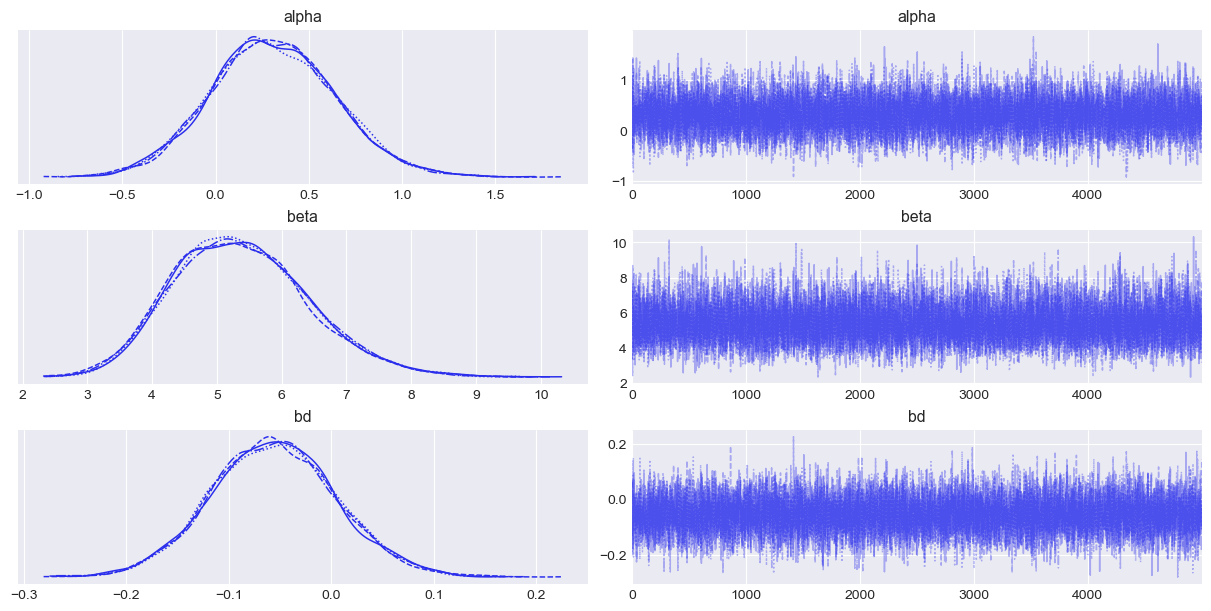

In [53]:
with pm.Model() as model_0:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10)

    mu = alpha + pm.math.dot(x_c, beta)
    theta = pm.Deterministic("theta", 1 / (1 + pm.math.exp(-mu)))
    bd = pm.Deterministic("bd", -alpha/beta)

    yl = pm.Bernoulli("yl", p=theta, observed=y_0)
    trace_0 = pm.sample(5000, return_inferencedata=False, tune=1000, chains=4)

# chain_0 = trace_0[1000:]
varnames = ["alpha", "beta", "bd"]
az.plot_trace(trace_0, varnames)
plt.tight_layout()
plt.savefig("img505.png")

az.summary(trace_0, varnames)

Text(0, 0.5, '$\\theta$')

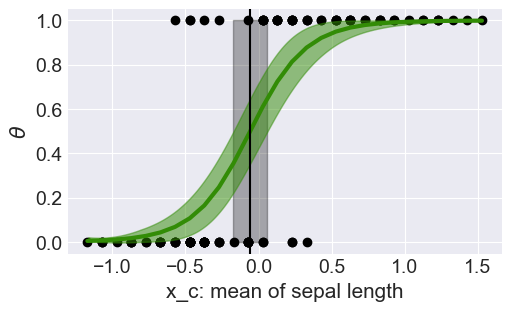

In [78]:
# データを、それにフィッティングしたシグモイド曲線でグラフで見てみる
plt.figure(figsize=(5,3))
theta = trace_0["theta"].mean(axis=0)
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color="C2", lw=3)
plt.axvline(trace_0["bd"].mean(), ymax=1, color="k")
# bd_hpd = pm.hpd(trace_0["bd"])
bd_hpd = az.hdi(trace_0["bd"])
assert bd_hpd.shape[0] == 2
plt.fill_betweenx([0, 1], 
                 bd_hpd[0], bd_hpd[1],
                 color="k",
                 alpha=0.3,
                 )
plt.scatter(x_c, y_0, marker="o", color="k")
az.plot_hdi(x_c, trace_0["theta"], color="C2")
plt.xlabel("x_c: mean of sepal length")
plt.ylabel(r"$\theta$")


In [79]:
# 予測の実行
def classify(n, threshold):
    """
    A simple classifying function
    """
    n = np.array(n)
    mu = trace_0["alpha"].mean() + trace_0["beta"].mean() * n
    prob = 1 / (1 + np.exp(-mu))
    return prob, prob >= threshold

classify([5, 5.5, 6], 0.5)

(array([1., 1., 1.]), array([ True,  True,  True]))

## 5.2 多重ロジスティック回帰
線形重回帰と同様に、多重ロジスティック回帰は２つ以上の独立変数を扱える。データの前処理を少し追加して、萼片の長さと萼片の幅を組み入れる

In [83]:
query_tuple = tuple(["setosa", "versicolor"])
df = iris.query(f"species in {query_tuple}")
y_1 = pd.Categorical(df["species"]).codes
x_n = ["sepal_length", "sepal_width"]
x_1 = df[x_n].values

print(f"{x_1.shape=}, {y_1.shape=}")

x_1.shape=(100, 2), y_1.shape=(100,)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module nam

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 13 seconds.
There were 52 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
There were 140 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6876882685248246, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a m

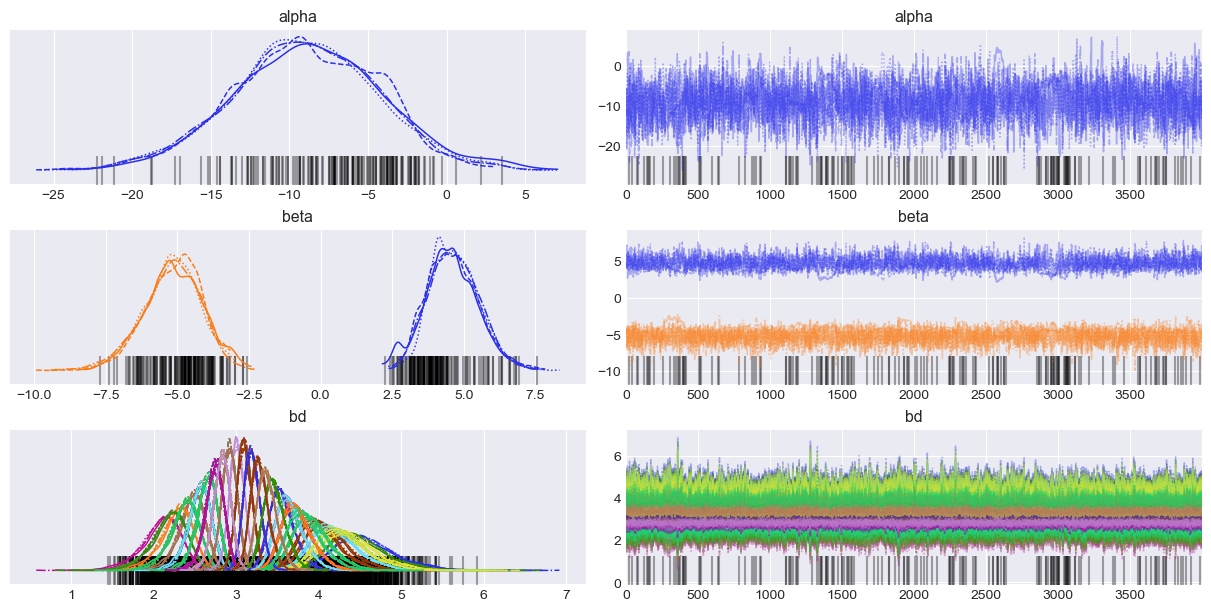

In [93]:
with pm.Model() as model_1:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=2, shape=len(x_n))
    mu = alpha + pm.math.dot(x_1, beta)
    theta = 1 / (1 + pm.math.exp(-mu))
    # theta = pm.Deterministic("theta", 1 / (1 + pm.math.exp(-mu)))  # 分布でない
    bd = pm.Deterministic("bd", -alpha/beta[1] - beta[0]/beta[1] * x_1[:,0])
    yl = pm.Bernoulli("yl", p=theta, observed=y_1)
    trace_1 = pm.sample(5000, return_inferencedata=False)

chain_1 = trace_1[1000:]
varnames = ["alpha", "beta", "bd"]

az.plot_trace(chain_1, varnames)
plt.tight_layout()
plt.savefig("img507.png")


/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


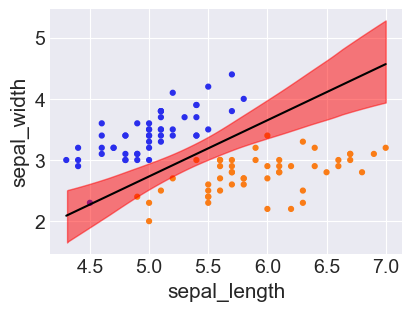

In [115]:
idx = np.argsort(x_1[:,0])
ld = chain_1["bd"].mean(0)[idx]

plt.figure(figsize=(4,3))
plt.scatter(x_1[:,0], x_1[:,1], 
            c=[f'C{x}' for x in y_0], 
            # cmap="viridis",
            s=12)
plt.plot(x_1[:,0][idx], ld, color="k")

az.plot_hdi(x_1[:,0], trace_1["bd"], color="r")
plt.xlabel(x_n[0])
plt.ylabel(x_n[1])
plt.savefig("img507.png")
plt.show()


↑決定境界はあくまで１本の直線であり、周囲の帯は直線の集合体を表す。HPDではない！

/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_98355/1952221084.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris.query("species != 'virginica'").corr()


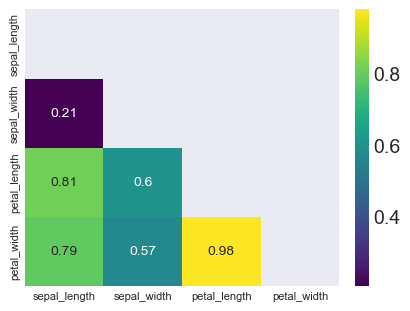

In [125]:
corr = iris.query("species != 'virginica'").corr()
mask = np.tri(*corr.shape).T


plt.figure(figsize=(4,3))
plt.tick_params(labelsize=8)
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap="viridis")
plt.savefig("img509.png")
plt.show()

## 5.2.4 アンバランスなクラスの取り扱い
クラスバランスが悪いと、ロジスティック回帰はうまくいかない。正確な境界が得られなくなる。

In [ ]:
query_tuple = tuple(["setosa", "versicolor"])
df = iris.query(f"species in {query_tuple}")
df = df[45:]
y_3 = pd.Categorical(df["species"]).codes
x_n = ["sepal_length", "sepal_width"]
x_1 = df[x_n].values

print(f"{x_1.shape=}, {y_1.shape=}")

In [98]:
x_1

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,